In [36]:
import pandas as pd
pokemons=pd.read_csv('Resources/pokemon.csv')
combats=pd.read_csv('Resources/combats.csv')
tests=pd.read_csv('tests.csv')
print(pokemons.isnull().sum())

missing_pokemon = pokemons[pokemons['Name'].isnull()]
display(missing_pokemon)
pokemons.loc[pokemons['#'] == 63, 'Name'] = 'Primeape'
print(pokemons[pokemons['#'] == 63])
#it is primeape that the name is missing

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62  63  Primeape  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  


In [28]:
print("Missing values in Fights dataset:")
print(combats.isnull().sum())

print("Missing values in tests dataset:")
print(tests.isnull().sum())

Missing values in Fights dataset:
First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64
Missing values in tests dataset:
First_pokemon     0
Second_pokemon    0
dtype: int64


In [22]:
# to są walki primeapa, bo jesli usunielibysmy jego z pokemenow to tez trzebaby bylo stasd usunac
missing_name_ids = missing_ids = missing_pokemon['#'].values
fights_with_missing = combats[
    (combats['First_pokemon'].isin(missing_name_ids)) |
    (combats['Second_pokemon'].isin(missing_name_ids))
]
display(fights_with_missing)
print(len(fights_with_missing))

,First_pokemon,Second_pokemon,Winner
113,63,297,63
246,63,82,63
974,63,399,63
1144,63,428,428
1507,369,63,63
...,...,...,...
48228,374,63,63
48637,63,170,63
48830,63,358,63
49343,63,108,63


108


In [30]:
corrupted_fights = combats[
    (combats['Winner'] != combats['First_pokemon']) &
    (combats['Winner'] != combats['Second_pokemon'])
]

print("Corrupted fights (winner not one of the two fighters):")
print(corrupted_fights)

self_fights = combats[combats['First_pokemon'] == combats['Second_pokemon']]

print("Fights where the same Pokémon is fighting itself:")
print(self_fights)

test_self_fights = tests[tests['First_pokemon'] == tests['Second_pokemon']]

print("Fights where the same Pokémon is fighting itself:")
print(self_fights)
print("Tests where the same Pokémon is fighting itself:")
print(test_self_fights)

Corrupted fights (winner not one of the two fighters):
Empty DataFrame
Columns: [First_pokemon, Second_pokemon, Winner]
Index: []
Fights where the same Pokémon is fighting itself:
Empty DataFrame
Columns: [First_pokemon, Second_pokemon, Winner]
Index: []
Fights where the same Pokémon is fighting itself:
Empty DataFrame
Columns: [First_pokemon, Second_pokemon, Winner]
Index: []
Tests where the same Pokémon is fighting itself:
Empty DataFrame
Columns: [First_pokemon, Second_pokemon]
Index: []


In [23]:
same_type_pokemon = pokemons[pokemons['Type 1'] == pokemons['Type 2']]

print("Pokémon with same Type 1 and Type 2:")
print(same_type_pokemon[['Name', 'Type 1', 'Type 2']])

Pokémon with same Type 1 and Type 2:
Empty DataFrame
Columns: [Name, Type 1, Type 2]
Index: []


In [31]:
duplicate_pokemon = pokemons[pokemons.duplicated(subset='#', keep=False)]
duplicate_name_pokemon = pokemons[pokemons.duplicated(subset='Name', keep=False)]
print("Pokémon with duplicate IDs:")
print(duplicate_pokemon[['#', 'Name', 'Type 1', 'Type 2']])
print("Pokémon with duplicate Names:")
print(duplicate_name_pokemon[['#', 'Name', 'Type 1', 'Type 2']])

Pokémon with duplicate IDs:
Empty DataFrame
Columns: [#, Name, Type 1, Type 2]
Index: []
Pokémon with duplicate IDs:
Empty DataFrame
Columns: [#, Name, Type 1, Type 2]
Index: []


In [33]:
pokemons.info()
combats.info()
tests.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  i

In [39]:
type1_unique = pokemons['Type 1'].unique()
type2_unique = pokemons['Type 2'].unique()

print(type1_unique)
print(type2_unique)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


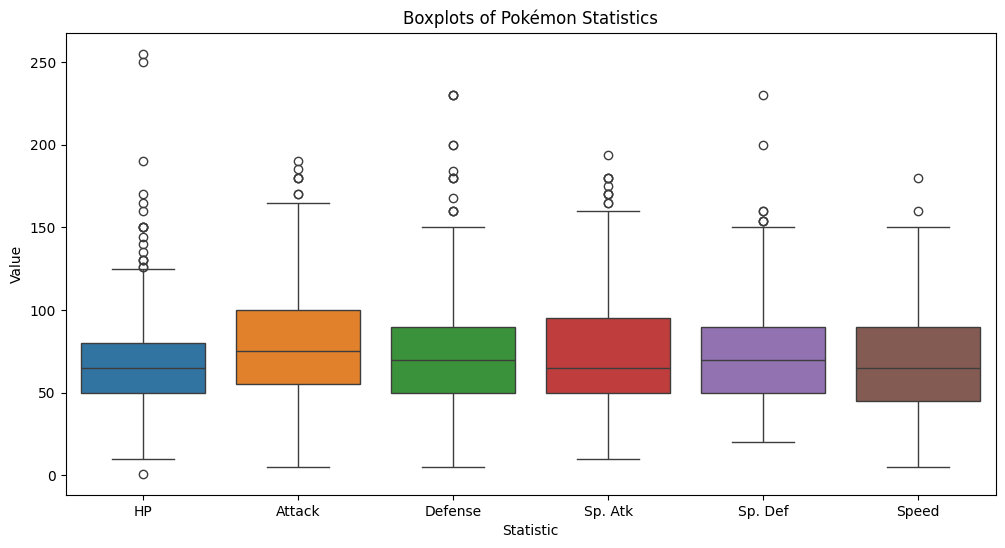

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical stats columns
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=pokemons[stats_columns])

# Set the title and labels
plt.title('Boxplots of Pokémon Statistics')
plt.xlabel('Statistic')
plt.ylabel('Value')

# Show the plot
plt.show()

In [42]:



def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for stat in stats_columns:
    outliers = find_outliers(pokemons, stat)
    outliers=outliers.sort_values(stat, ascending=False)
    print(f"\nOutliers for {stat}:")
    print(outliers[['Name', stat]])


Outliers for HP:
                       Name   HP
261                 Blissey  255
121                 Chansey  250
217               Wobbuffet  190
351                 Wailord  170
655               Alomomola  165
155                 Snorlax  160
544  Giratina Altered Forme  150
545   Giratina Origin Forme  150
313                 Slaking  150
473                Drifblim  150
321                Hariyama  144
45               Wigglytuff  140
495                Munchlax  135
142                  Lapras  130
145                Vaporeon  130
350                 Wailmer  130
792                 Xerneas  126
793                 Yveltal  126
316                Shedinja    1

Outliers for Attack:
                    Name  Attack
163        Mega Mewtwo X     190
232       Mega Heracross     185
424       Primal Groudon     180
426        Mega Rayquaza     180
429   DeoxysAttack Forme     180
494        Mega Garchomp     170
711  Kyurem Black Kyurem     170

Outliers for Defense:
             